<img src="../img/my_img.png" alt="img" width="400" height="250"/>

<hr>

 <table>
    <tr>
        <th>STT</th>
        <th>Table of Contents</th>
    </tr>
    <tr>
        <th>1</th>
        <th>Importing Libraries</th>
    </tr>
    <tr>
        <th>2</th>
        <th>Loading Data</th>
    </tr>
    <tr>
        <th>3</th>
        <th>Data Cleaning</th>
    </tr>
    <tr>
        <th>4</th>
        <th>Dimensionality Reduction</th>
    </tr>
    <tr>
        <th>5</th>
        <th>Data Visualization</th>
    </tr>
    <tr>
        <th>6</th>
        <th>Clustering</th>
    </tr>
    <tr>
        <th>7</th>
        <th>Evaluating Models</th>
    </tr>
    <tr>
        <th>8</th>
        <th>Conclusion</th>
    </tr>
    <tr>
        <th>9</th>
        <th>End</th>
    </tr>
</table>

<h3>Importing Libraries</h3>
<hr/>

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
import plotly.express as pe
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
import math
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

se.set_theme()

<h3>Loading Data</h3>
<hr/>

In [2]:
path = './customers.csv'
myData = pd.read_csv(path)
myData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data_info = pd.DataFrame(columns=['Name of col','Num of null','Dtype','N_Unique'])
for i in range(0,len(myData.columns)):
    data_info.loc[i] = [myData.columns[i],myData[myData.columns[i]].isnull().sum(),myData[myData.columns[i]].dtypes,myData[myData.columns[i]].nunique()]
data_info

,Name of col,Num of null,Dtype,N_Unique
0,ID,0,int64,2240
1,Year_Birth,0,int64,59
2,Education,0,object,5
3,Marital_Status,0,object,8
4,Income,24,float64,1974
5,Kidhome,0,int64,3
6,Teenhome,0,int64,3
7,Dt_Customer,0,object,663
8,Recency,0,int64,100
9,MntWines,0,int64,776


<h3>Data Cleaning</h3>
<hr/>

In [4]:
myData['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [5]:
myData['Education'] = myData['Education'].replace(['2n Cycle','Master','PhD','Graduation'],'Post Graduation')
myData['Education'] = myData['Education'].replace(['Basic'],'Under Graduation')

In [6]:
myData['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [7]:
myData['Marital_Status'] = myData['Marital_Status'].replace(['Married','Together'],'Married')
myData['Marital_Status'] = myData['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')

Create new data features

In [8]:
myData['Age'] = datetime.date.today().year - myData['Year_Birth']

In [9]:
myData["Kids"] = myData['Kidhome'] + myData['Teenhome']

In [10]:
myData['HasChildren'] = np.where(myData['Kids']>0,1,0)

In [11]:
def getMonth(date):
    today = datetime.datetime.today()
    date_str = str(date.day)+"/"+str(date.month)+"/"+str(date.year)
    temp = datetime.datetime.strptime(date_str,"%d/%m/%Y")
    return (today-temp).days/30

In [12]:
myData['Dt_Customer'] = pd.to_datetime(myData['Dt_Customer'],dayfirst=True,format="%d-%m-%Y")

In [13]:
myData['Time_withCompany'] = [getMonth(dt) for dt in myData['Dt_Customer']]

In [14]:
myData['Spending'] = myData['MntWines'] + myData['MntFruits'] + myData['MntMeatProducts'] + myData['MntFishProducts'] + myData['MntSweetProducts'] + myData['MntGoldProds']

In [15]:
myData['TotalAccepted'] = myData['AcceptedCmp1'] + myData['AcceptedCmp2'] + myData['AcceptedCmp3'] + myData['AcceptedCmp4'] + myData['AcceptedCmp5'] + myData['Response']

<h3>Dimensionality Reduction</h3>

In [16]:
myData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,HasChildren,Time_withCompany,Spending,TotalAccepted
0,5524,1957,Post Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,64,0,0,113.100000,1617,1
1,2174,1954,Post Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,67,2,1,94.766667,27,0
2,4141,1965,Post Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,56,0,0,101.400000,776,0
3,6182,1984,Post Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,37,1,1,95.633333,53,0
4,5324,1981,Post Graduation,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,40,1,1,96.366667,422,0


In [17]:
myData.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Kids', 'HasChildren', 'Time_withCompany', 'Spending',
       'TotalAccepted'],
      dtype='object')

Drop columns

In [16]:
needDel = ['ID','Year_Birth','Kidhome','Teenhome','Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Z_CostContact','Z_Revenue']
myData.drop(columns=needDel,inplace=True)

Drop rows

In [17]:
myData.dropna(inplace=True)

In [18]:
myData.drop(index=myData[myData['Age']>100].index,inplace=True)

In [21]:
myData.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2213.0,52236.581563,25178.603047,1730.0,35246.0,51373.000000,68487.000000,666666.0
Recency,2213.0,49.007682,28.941864,0.0,24.0,49.000000,74.000000,99.0
MntWines,2213.0,305.153638,337.305490,0.0,24.0,175.000000,505.000000,1493.0
MntFruits,2213.0,26.323995,39.735932,0.0,2.0,8.000000,33.000000,199.0
MntMeatProducts,2213.0,166.962494,224.226178,0.0,16.0,68.000000,232.000000,1725.0
MntFishProducts,2213.0,37.635337,54.763278,0.0,3.0,12.000000,50.000000,259.0
MntSweetProducts,2213.0,27.034794,41.085433,0.0,1.0,8.000000,33.000000,262.0
MntGoldProds,2213.0,43.911432,51.699746,0.0,9.0,24.000000,56.000000,321.0
NumDealsPurchases,2213.0,2.325350,1.924402,0.0,1.0,2.000000,3.000000,15.0
NumWebPurchases,2213.0,4.087664,2.741664,0.0,2.0,4.000000,6.000000,27.0


We need to drop exceptions

<AxesSubplot:xlabel='Spending', ylabel='Income'>

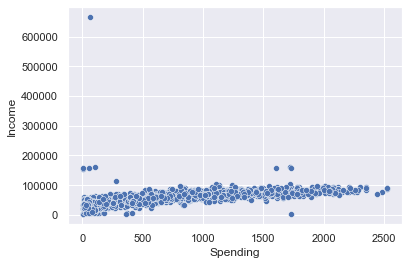

In [19]:
se.scatterplot(data=myData,x='Spending',y='Income')

In [23]:
def num_plot(myData,col):
    fig = pe.histogram(myData,x=col,marginal='box')
    fig.update_layout(height=300,width=500,showlegend=True)
    fig.update_traces(marker_line_width=1,marker_line_color='black')
    fig.show()
num_plot(myData,'Income')

In [20]:
myData.drop(index=myData[myData['Income']>600000]['Income'].index,inplace=True)

In [25]:
num_plot(myData,'NumWebPurchases')

In [26]:
myData['NumWebPurchases'].value_counts()

2     367
1     347
3     333
4     276
5     219
6     201
7     154
8     102
9      75
0      48
11     44
10     43
23      1
25      1
27      1
Name: NumWebPurchases, dtype: int64

In [21]:
myData.drop(index=myData[myData['NumWebPurchases']>20].index,inplace=True)

In [28]:
num_plot(myData,'NumCatalogPurchases')

In [29]:
myData['NumCatalogPurchases'].value_counts()

0     573
1     489
2     274
3     182
4     181
5     137
6     127
7      79
8      55
10     47
9      42
11     19
28      3
22      1
Name: NumCatalogPurchases, dtype: int64

In [22]:
myData.drop(index=myData[myData['NumCatalogPurchases']>20].index,inplace=True)

In [31]:
myData.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51850.314739,21087.414420,1730.0,35322.0,51369.000000,68397.000000,162397.0
Recency,2205.0,49.050340,28.907665,0.0,24.0,49.000000,74.000000,99.0
MntWines,2205.0,306.175057,337.485647,0.0,24.0,178.000000,507.000000,1493.0
MntFruits,2205.0,26.400000,39.786403,0.0,2.0,8.000000,33.000000,199.0
MntMeatProducts,2205.0,164.520635,215.268956,0.0,16.0,68.000000,232.000000,984.0
MntFishProducts,2205.0,37.755102,54.825485,0.0,3.0,12.000000,50.000000,259.0
MntSweetProducts,2205.0,27.007710,40.830083,0.0,1.0,8.000000,33.000000,198.0
MntGoldProds,2205.0,43.783220,51.142564,0.0,9.0,25.000000,56.000000,262.0
NumDealsPurchases,2205.0,2.311565,1.867303,0.0,1.0,2.000000,3.000000,15.0
NumWebPurchases,2205.0,4.067120,2.629415,0.0,2.0,4.000000,6.000000,11.0


In [32]:
print("Shape of Data : ",myData.shape)

Shape of Data :  (2205, 23)


<h3>Data Visualization</h3>

<img src='../img/graph_img.gif' width=400 height=250/>
<hr/>

In [33]:
myData.head(5)

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Kids,HasChildren,Time_withCompany,Spending,TotalAccepted
0,Post Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,...,10,4,7,0,64,0,0,113.100000,1617,1
1,Post Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,...,1,2,5,0,67,2,1,94.766667,27,0
2,Post Graduation,Married,71613.0,2013-08-21,26,426,49,127,111,21,...,2,10,4,0,56,0,0,101.400000,776,0
3,Post Graduation,Married,26646.0,2014-02-10,26,11,4,20,10,3,...,0,4,6,0,37,1,1,95.633333,53,0
4,Post Graduation,Married,58293.0,2014-01-19,94,173,43,118,46,27,...,3,6,5,0,40,1,1,96.366667,422,0


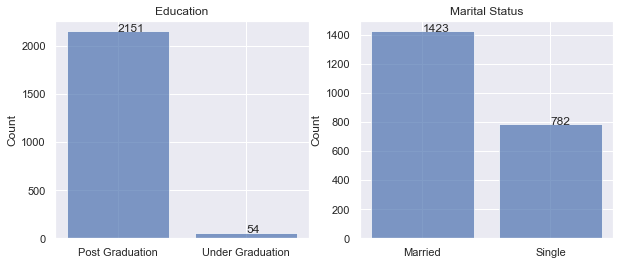

In [34]:
edu = myData['Education'].value_counts()
mrS = myData['Marital_Status'].value_counts()
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(edu.index,edu.values,alpha=0.7)
plt.title("Education")
plt.ylabel('Count')
for i in range(len(edu)):
    plt.text(edu.index[i],edu.values[i],edu.values[i])

plt.subplot(1,2,2)
plt.bar(mrS.index,mrS.values,alpha=0.7)
plt.title("Marital Status")
plt.ylabel('Count')
for i in range(len(edu)):
    plt.text(mrS.index[i],mrS.values[i],mrS.values[i])

<AxesSubplot:xlabel='Spending', ylabel='Count'>

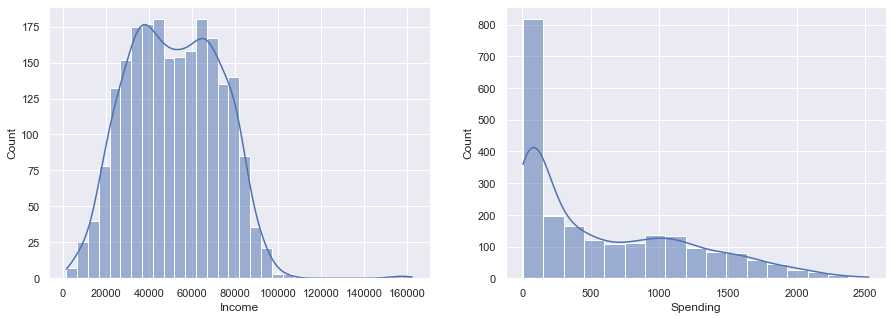

In [80]:
f1,ax1 = plt.subplots(1,2,figsize=(15,5))
se.histplot(data=myData,x='Income',ax=ax1[0],kde=True)
se.histplot(data=myData,x='Spending',ax=ax1[1],kde=True)

Education
Post Graduation     52642.215714
Under Graduation    20306.259259
Name: Income, dtype: float64


<AxesSubplot:xlabel='Education', ylabel='Income'>

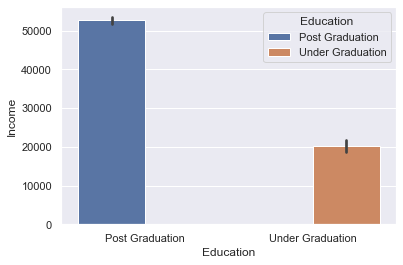

In [36]:
print(myData.groupby(by='Education')['Income'].mean())
se.barplot(data=myData,x='Education',y='Income',hue='Education')

In [53]:
product = myData.loc[:,['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].mean()
fig = pe.bar(x=product.index,y=product.values,color=product.index)
fig.update_layout(height=300,width=500)
fig.show()
num_plot(myData,'Spending')

Text(0.5, 1.0, 'TotalAccepted')

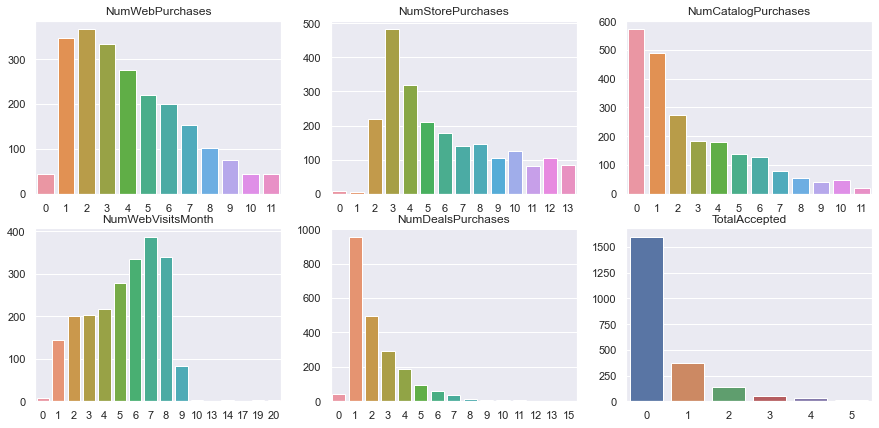

In [102]:
NumWebPurchases = myData['NumWebPurchases'].value_counts()
NumStorePurchases = myData['NumStorePurchases'].value_counts()
NumCatalogPurchases = myData['NumCatalogPurchases'].value_counts()
NumWebVisitsMonth = myData['NumWebVisitsMonth'].value_counts()
NumDealsPurchases = myData['NumDealsPurchases'].value_counts()
TotalAccepted = myData['TotalAccepted'].value_counts()
f2,ax2 = plt.subplots(2,3,figsize=(15,7))
se.barplot(x=NumWebPurchases.index,y=NumWebPurchases.values,ax=ax2[0,0])
ax2[0,0].set_title('NumWebPurchases')
se.barplot(x=NumStorePurchases.index,y=NumStorePurchases.values,ax=ax2[0,1])
ax2[0,1].set_title('NumStorePurchases')
se.barplot(x=NumCatalogPurchases.index,y=NumCatalogPurchases.values,ax=ax2[0,2])
ax2[0,2].set_title('NumCatalogPurchases')
se.barplot(x=NumWebVisitsMonth.index,y=NumWebVisitsMonth.values,ax=ax2[1,0])
ax2[1,0].set_title('NumWebVisitsMonth')
se.barplot(x=NumDealsPurchases.index,y=NumDealsPurchases.values,ax=ax2[1,1])
ax2[1,1].set_title('NumDealsPurchases')
se.barplot(x=TotalAccepted.index,y=TotalAccepted.values,ax=ax2[1,2])
ax2[1,2].set_title('TotalAccepted')

In [40]:
myData.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Age', 'Kids', 'HasChildren',
       'Time_withCompany', 'Spending', 'TotalAccepted'],
      dtype='object')

In [41]:
cml = myData['Complain'].value_counts()
fg = pe.pie(myData,cml.index,cml.values)
fg.update_layout(height=300,width=300)

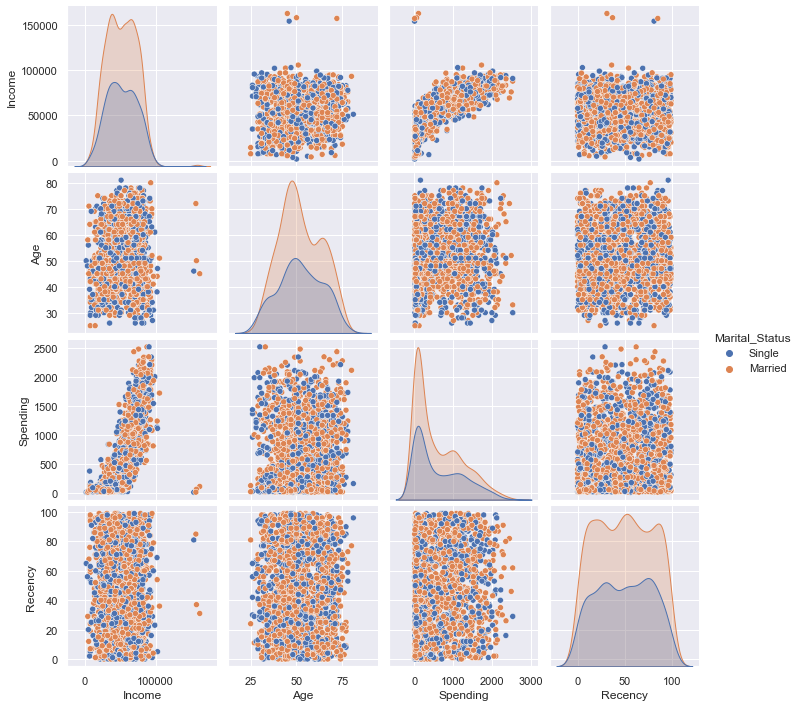

In [73]:
pairplot = myData.loc[:,['Income','Age','Spending','Recency','Marital_Status']]
se.pairplot(pairplot,hue='Marital_Status')

(40, 60]     1219
(60, 80]      606
(20, 40]      379
(80, 100]       1
(0, 20]         0
Name: Age, dtype: int64


Text(0.5, 1.0, 'Countplot of Age')

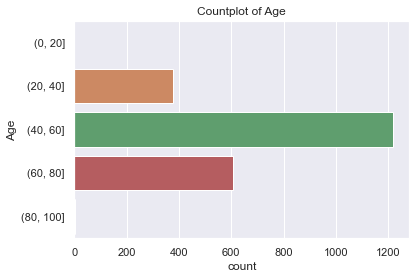

In [66]:
bins = [0,20,40,60,80,100]
aged = pd.cut(myData['Age'],bins=bins)
print(aged.value_counts())

se.countplot(y=aged)
plt.title('Countplot of Age')

<img src='../img/boxplot.png' height=250 width=400/>

<AxesSubplot:xlabel='Age', ylabel='Spending'>

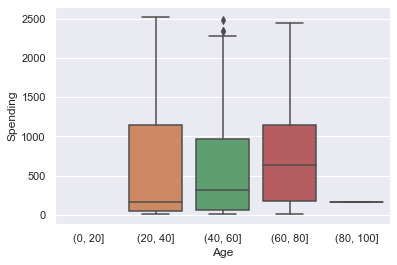

In [109]:
se.boxplot(x=aged,y=myData['Spending'])

In [113]:
pe.box(myData,x='Marital_Status',y='Spending',color='Marital_Status').update_layout(height=400,width=600)

In [111]:
pe.box(myData,x='Education',y='Spending',color='Education').update_layout(height=400,width=600)

<h3>Linear Regression Model</h3><p>Income and Spending<p>
<hr/>

In [141]:
SpIn = myData.loc[:,['Income','Spending']].copy()

<AxesSubplot:xlabel='Income', ylabel='Spending'>

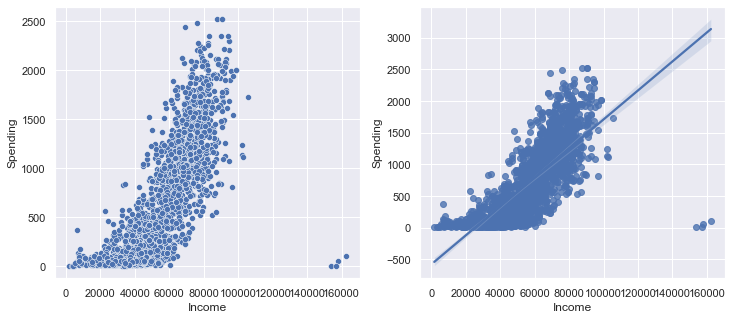

In [142]:
f,axs = plt.subplots(1,2,figsize=(12,5))
se.scatterplot(data=SpIn,x='Income',y='Spending',ax=axs[0])
se.regplot(data=SpIn,x='Income',y='Spending',ax=axs[1])

In [149]:
SpIn.drop(index=SpIn[SpIn['Income']>140000].index,inplace=True)

<AxesSubplot:xlabel='Income', ylabel='Spending'>

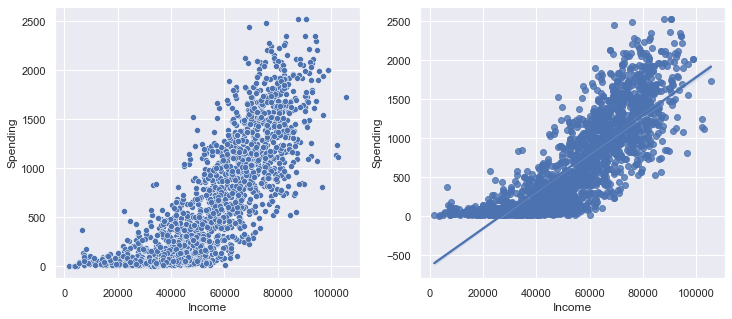

In [150]:
f,axs = plt.subplots(1,2,figsize=(12,5))
se.scatterplot(data=SpIn,x='Income',y='Spending',ax=axs[0])
se.regplot(data=SpIn,x='Income',y='Spending',ax=axs[1])

Training Set and Testing Set

In [167]:
SpIn_train,SpIn_test = train_test_split(SpIn,random_state=20,test_size=0.2)
lR = LinearRegression()
lR.fit(SpIn_train.loc[:,['Income']],SpIn_train.loc[:,['Spending']])
predict = lR.predict(SpIn_test.loc[:,['Income']])

MAE (Mean Absolute Error)

In [162]:
def mae(y_test,y_pre):
    n = len(y_test)
    sm = 0
    for i in range(n):
        sm += abs(y_pre[i,:]-y_test[i,:])
    return sm/n

In [170]:
mae = metrics.mean_absolute_error(SpIn_test.loc[:,['Spending']],predict)
print('MAE:',round(mae,2))

MAE: 244.71


<h3>Clustering : KMeans</h3>

<img src='../img/k-means-steps.gif' height=250 width=400/>
<hr/>

In [29]:
X = myData.loc[:,['Income','Spending','Time_withCompany']].copy()
X.head()

,Income,Spending,Time_withCompany
0,58138.0,1617,113.100000
1,46344.0,27,94.766667
2,71613.0,776,101.400000
3,26646.0,53,95.633333
4,58293.0,422,96.366667


<p><b>Data standardization</b></p>
<p>z = (x-u)/s</p>
<p>u : mean (trung bình)</p>
<p>s : standard deviation (độ lệch chuẩn)</p>

In [57]:
sd = StandardScaler()
temp = sd.fit_transform(X)
X_new = pd.DataFrame({
    X.columns[0]:temp[:,0],
    X.columns[1]:temp[:,1],
    X.columns[2]:temp[:,2]
})
X_new.head()

,Income,Spending,Time_withCompany
0,0.298240,1.681498,1.527764
1,-0.261178,-0.962057,-1.189818
2,0.937392,0.283240,-0.206547
3,-1.195501,-0.918829,-1.061351
4,0.305592,-0.305325,-0.952647


<p><b>Finding cluster</b></p>

Text(0, 0.5, 'sse')

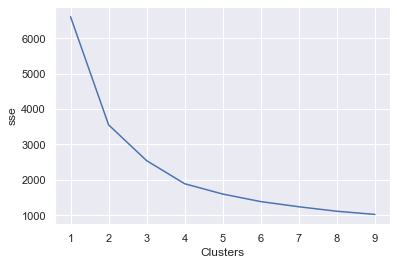

In [59]:
sse = []
clusters = range(1,10)
for c in clusters:
    kmeans = KMeans(n_clusters=c).fit(X_new)
    sse.append(kmeans.inertia_)
    # inertia_ Tổng bình phương khoảng cách của các mẫu đến điểm center của cụm gần nhất của chúng
plt.plot(clusters,sse)
plt.xlabel('Clusters')
plt.ylabel('sse')

In [60]:
K = 4

In [69]:
def choise_centers(X,K):
    np.random.seed(20)
    return X[np.random.choice(X.shape[0],K,replace=False)]

In [44]:
def assign_labels(X,centers):
    D = cdist(X,centers)
    return np.argmin(D,axis=1)

In [42]:
def update_centers(X,labels,K):
    centers = np.zeros((K,X.shape[1]))
    for i in range(K):
        Xk = X[labels==i,:]
        centers[i,:] = np.mean(Xk,axis=0)
    return centers

In [146]:
def check_centers(centers,new_centers):
    for i in range(centers.shape[0]):
        for j in range(centers.shape[1]):
            if centers[i][j]!=new_centers[i][j]:return False
    return True

In [96]:
def Kmeans(X,K):
    i = 0
    centers = [choise_centers(X,K)]
    labels = []
    while True:
        i += 1
        labels.append(assign_labels(X,centers[-1]))
        new_centers = update_centers(X,labels[-1],K)
        if check_centers(centers[-1],new_centers):
            break
        centers.append(new_centers)
    return (i,labels[-1],centers[-1])

In [148]:
(i,labels,centers) = Kmeans(np.array(X_new),K)
X_new['label'] = labels
X_new.head()

,Income,Spending,Time_withCompany,label
0,0.298240,1.681498,1.527764,3
1,-0.261178,-0.962057,-1.189818,1
2,0.937392,0.283240,-0.206547,0
3,-1.195501,-0.918829,-1.061351,1
4,0.305592,-0.305325,-0.952647,1


In [138]:
pe.scatter_3d(X_new,x='Income',y='Spending',z='Time_withCompany',color='label').update_layout(height=500,width=800)

<h3>Evaluating Models</h3>
<hr/>

<p>Linear Regression Model</p>
<p> + Độ lệnh trung bình so với dữ liệu thực dựa theo công thức MAE là 244.71</p>
<p> + Độ lệch khá lớn do dữ liệu có nhiều điểm dữ liệu nhiễu</p>

<p>Bảng kết quả thu được</p>
<table>
    <tr>
        <th>Cluster</th>
        <th>Income</th>
        <th>Spending</th>
        <th>Time with company</th>
    </tr>
    <tr>
        <th>0</th>
        <th>high</th>
        <th>high</th>
        <th>short time</th>
    </tr>
    <tr>
        <th>1</th>
        <th>low</th>
        <th>low</th>
        <th>short time</th>
    </tr>
    <tr>
        <th>2</th>
        <th>low</th>
        <th>low</th>
        <th>a long time</th>
    </tr>
    <tr>
        <th>3</th>
        <th>high</th>
        <th>high</th>
        <th>a long time</th>
    </tr>
</table>